# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df= pd.read_csv('F:/Board Infinity/Python/Project/playstore-analysis.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

### Understanding data

In [5]:
#Que_1

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Information of data, with data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


### quantile ranges

In [5]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [6]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [7]:
# a. Drop records where rating is missing since rating is our target/study variable

#Lets clean the all 3 records having the same problem?

# Replace remaining missing values with the mode of Rating-

rating_mode = df['Rating'].mode()

rating_mode

0    4.4
dtype: float64

In [8]:
#filling rating with mode value

df['Rating'].fillna(value=rating_mode[0], inplace = True)

In [9]:
#again checking the results

missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

#cleaned Rating column

Current Ver       8
Android Ver       3
Type              1
Content Rating    1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Genres            0
Last Updated      0
dtype: int64

In [10]:
#lets work on current version, android version, type

df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [11]:
df = df.drop(df[df['Current Ver'].isnull()].index)

In [12]:
#Dropped the values with object and we will get all values as float

df = df.drop(df[df['Current Ver']=='Varies with device'].index)

### remove the decimals from current version Column

In [13]:
df['Current Ver'] = df['Current Ver'].apply(lambda x:str(x).split('.',1)[0])

In [14]:
df['Current Ver'].mode()

0    1
dtype: object

### values will be filled with mode value

In [15]:
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace = True) 

In [16]:
#again checking the results

missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

#here we can see over current version is cleaned, lets move ahead.

Android Ver       3
Content Rating    1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Genres            0
Last Updated      0
Current Ver       0
dtype: int64

In [17]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.4 and up', '2.3 and up', '4.2 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '2.3.3 and up', '6.0 and up', '5.0 and up', 'Varies with device',
       '1.6 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '1.5 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

### check mode values in Android Ver column

In [18]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [19]:
df['Android Ver'].replace(to_replace=['4.1W and up','Varies with device'], value=['4.1','1.0'],inplace=True)

In [20]:
#this is new column with unique values of Android Ver column

df['Android Ver'].unique()

array(['4.0.3 and up', '4.4 and up', '2.3 and up', '4.2 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '2.3.3 and up', '6.0 and up', '5.0 and up', '1.0', '1.6 and up',
       '2.1 and up', '7.0 and up', '5.1 and up', '1.5 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

### cleaned Android version column 

In [21]:
df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0', inplace=True)

In [22]:
df['Android Ver'].unique() #see we have got unique and cleaned values for android version with dictionary.

array(['4.0', '2.0', '3.0', '6.0', '5.0', '1.0', '7.0', '4.4W and up',
       '8.0'], dtype=object)

In [23]:
df['Android Ver'].mode() # mode of Android Ver

0    4.0
dtype: object

In [24]:
#values will be filled with mode value of 4
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace = True)

In [25]:
#we now need to check content rating column : check again

values = df.isnull().sum().sort_values(ascending = False)
values

Content Rating    1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
df['Content Rating'].mode() # mode of Content Rating column

0    Everyone
dtype: object

### fill mode value, where is value is nan, in Content Rating column

In [27]:
df['Content Rating'].fillna(str(df['Content Rating'].mode().values[0]), inplace = True)

In [28]:
#new results -- no any null values now --

missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9374 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9374 non-null   object 
 1   Category        9374 non-null   object 
 2   Rating          9374 non-null   float64
 3   Reviews         9374 non-null   object 
 4   Size            9374 non-null   float64
 5   Installs        9374 non-null   object 
 6   Type            9374 non-null   object 
 7   Price           9374 non-null   object 
 8   Content Rating  9374 non-null   object 
 9   Genres          9374 non-null   object 
 10  Last Updated    9374 non-null   object 
 11  Current Ver     9374 non-null   object 
 12  Android Ver     9374 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [30]:
df.head(2)

#Type, Size, Installs, Reviews, Genres and Last updated  column review --

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2,4.0


## Task 2

In [ ]:
#checking Type column's unique values

In [31]:
df['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [ ]:
# Replace 0 values with free

In [32]:
df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)

### checking Installs column's unique values

In [33]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '50,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '1,000,000,000+', '0+', 'Free'], dtype=object)

### convert Installs column object into integer data type, and replacing  + sign with 0 and , sign with ''(nothing)

In [34]:
df['Installs'] = df['Installs'].apply(lambda x:x.split('+')[0]) #replacing + with 0

In [35]:
df['Installs'] = df['Installs'].apply(lambda x:x.replace(',', '')) #replacing , with ''(blank, nothing)

In [36]:
df= df.drop(df[df['Installs']== 'Free'].index) # Drop column where free values

In [37]:
# Now Installs column is not integer data type, let change into integer data type
df['Installs'] = pd.to_numeric(df['Installs'])

In [38]:
df['Installs'].unique()

array([     10000,     500000,    5000000,     100000,      50000,
          1000000,   10000000,       5000,  100000000,   50000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0],
      dtype=int64)

### Reviews column unique values

In [39]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '885', '603', '1195'], dtype=object)

### convert Reviews column values into numeric values

In [40]:
df.Reviews=pd.to_numeric(df.Reviews)

### Size column unique values

In [41]:
df['Size'].unique()

array([1.90000000e+04, 1.40000000e+04, 8.70000000e+03, 2.80000000e+03,
       5.60000000e+03, 2.90000000e+04, 3.30000000e+04, 3.10000000e+03,
       2.80000000e+04, 1.20000000e+04, 2.00000000e+04, 2.10000000e+04,
       3.70000000e+04, 5.50000000e+03, 1.70000000e+04, 3.90000000e+04,
       3.10000000e+04, 4.20000000e+03, 7.00000000e+03, 2.30000000e+04,
       6.00000000e+03, 2.50000000e+04, 6.10000000e+03, 4.60000000e+03,
       9.20000000e+03, 5.20000000e+03, 1.10000000e+04, 2.40000000e+04,
       9.40000000e+03, 1.50000000e+04, 1.00000000e+04, 1.20000000e+03,
       2.60000000e+04, 8.00000000e+03, 7.90000000e+03, 5.60000000e+04,
       5.70000000e+04, 3.50000000e+04, 5.40000000e+04, 2.01000000e+02,
       3.60000000e+03, 5.70000000e+03, 8.60000000e+03, 2.40000000e+03,
       2.70000000e+04, 2.70000000e+03, 2.50000000e+03, 1.60000000e+04,
       2.15165295e+04, 3.40000000e+03, 8.90000000e+03, 3.90000000e+03,
       2.90000000e+03, 3.80000000e+04, 3.20000000e+04, 5.40000000e+03,
      

### Replace mode value with nan in Size column

In [42]:
df['Size'].replace('Varies with device',np.nan, inplace = True)

In [43]:
df['Size'].unique() # now show unique values of size column

array([1.90000000e+04, 1.40000000e+04, 8.70000000e+03, 2.80000000e+03,
       5.60000000e+03, 2.90000000e+04, 3.30000000e+04, 3.10000000e+03,
       2.80000000e+04, 1.20000000e+04, 2.00000000e+04, 2.10000000e+04,
       3.70000000e+04, 5.50000000e+03, 1.70000000e+04, 3.90000000e+04,
       3.10000000e+04, 4.20000000e+03, 7.00000000e+03, 2.30000000e+04,
       6.00000000e+03, 2.50000000e+04, 6.10000000e+03, 4.60000000e+03,
       9.20000000e+03, 5.20000000e+03, 1.10000000e+04, 2.40000000e+04,
       9.40000000e+03, 1.50000000e+04, 1.00000000e+04, 1.20000000e+03,
       2.60000000e+04, 8.00000000e+03, 7.90000000e+03, 5.60000000e+04,
       5.70000000e+04, 3.50000000e+04, 5.40000000e+04, 2.01000000e+02,
       3.60000000e+03, 5.70000000e+03, 8.60000000e+03, 2.40000000e+03,
       2.70000000e+04, 2.70000000e+03, 2.50000000e+03, 1.60000000e+04,
       2.15165295e+04, 3.40000000e+03, 8.90000000e+03, 3.90000000e+03,
       2.90000000e+03, 3.80000000e+04, 3.20000000e+04, 5.40000000e+03,
      

#### Conversion to numeric data type

In [44]:
df['Size']=pd.to_numeric(df['Size']) 

In [45]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1,4.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1,2.0


In [48]:
df['Android Ver'].describe()

count     9373
unique       9
top        4.0
freq      6831
Name: Android Ver, dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9373 non-null   object 
 1   Category        9373 non-null   object 
 2   Rating          9373 non-null   float64
 3   Reviews         9373 non-null   int64  
 4   Size            9373 non-null   float64
 5   Installs        9373 non-null   int64  
 6   Type            9373 non-null   object 
 7   Price           9373 non-null   object 
 8   Content Rating  9373 non-null   object 
 9   Genres          9373 non-null   object 
 10  Last Updated    9373 non-null   object 
 11  Current Ver     9373 non-null   object 
 12  Android Ver     9373 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


### total no. of values in Price column

In [50]:
df['Price'].value_counts()

0         8642
$0.99      144
$2.99      116
$1.99       68
$4.99       62
          ... 
$19.90       1
$1.75        1
$14.00       1
$4.85        1
$1.04        1
Name: Price, Length: 88, dtype: int64

### Price column cleaning

In [51]:
#Remove $ sign in Price column

df.Price = df.Price.apply(lambda x: x.replace('$',''))

In [52]:
# And convert into float data type

df['Price'] = df['Price'].apply(lambda x: float(x))

In [53]:
df['Price'].describe()

count    9373.000000
mean        1.157213
std        17.144064
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [54]:
#last updated column change into datetime datatype

df['Last Updated'] =  pd.to_datetime(df['Last Updated'])

In [55]:
#Genres column

df['Genres'].value_counts()

Tools                                743
Entertainment                        540
Education                            497
Medical                              440
Business                             412
                                    ... 
Travel & Local;Action & Adventure      1
Music & Audio;Music & Video            1
Health & Fitness;Education             1
Board;Pretend Play                     1
Strategy;Creativity                    1
Name: Genres, Length: 118, dtype: int64

In [56]:
# Split the second genre after the semicolon (;)

df['Genres'] = df['Genres'].str.split(';').str[0]
df['Genres'].value_counts()

Tools                      743
Education                  579
Entertainment              576
Medical                    440
Business                   412
Personalization            355
Action                     351
Lifestyle                  350
Sports                     332
Productivity               320
Finance                    316
Communication              288
Photography                275
Health & Fitness           273
Casual                     250
Dating                     222
News & Magazines           219
Arcade                     219
Social                     216
Simulation                 207
Shopping                   202
Books & Reference          201
Travel & Local             197
Puzzle                     165
Video Players & Editors    138
Role Playing               119
Maps & Navigation          111
Racing                     109
Educational                107
Strategy                   105
Food & Drink               100
Adventure                   88
Librarie

In [57]:
# 'Music & Audio' should be grouped together with 'Music' since they're the same

df['Genres'].replace('Music & Audio', 'Music', inplace = True)
df['Genres'].value_counts()

Tools                      743
Education                  579
Entertainment              576
Medical                    440
Business                   412
Personalization            355
Action                     351
Lifestyle                  350
Sports                     332
Productivity               320
Finance                    316
Communication              288
Photography                275
Health & Fitness           273
Casual                     250
Dating                     222
News & Magazines           219
Arcade                     219
Social                     216
Simulation                 207
Shopping                   202
Books & Reference          201
Travel & Local             197
Puzzle                     165
Video Players & Editors    138
Role Playing               119
Maps & Navigation          111
Racing                     109
Educational                107
Strategy                   105
Food & Drink               100
Adventure                   88
Librarie

## Task 4

4. Identify and handle outliers –

In [58]:
x=df[['Price','Size','Rating']]
print(x)

       Price     Size  Rating
0        0.0  19000.0     4.1
1        0.0  14000.0     3.9
2        0.0   8700.0     4.7
4        0.0   2800.0     4.3
5        0.0   5600.0     4.4
...      ...      ...     ...
10834    0.0   2600.0     4.0
10835    0.0   9600.0     4.4
10836    0.0  53000.0     4.5
10837    0.0   3600.0     5.0
10838    0.0   9500.0     4.4

[9373 rows x 3 columns]


In [ ]:
# i. Make suitable plot to identify outliers in price column--

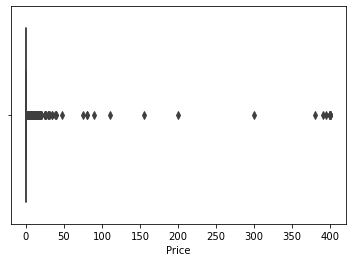

In [59]:
sns.boxplot(x['Price']);

In [ ]:
# ii. Do you expect apps on the play store to cost $200? Check out these cases

In [60]:
(df["Price"]==200).sum()

1

In [ ]:
# iv. Limit data to records with price < $30

In [61]:
y=(df["Price"]<30)

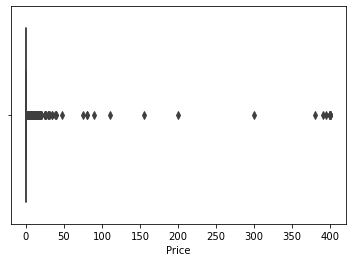

In [67]:
sns.boxplot((x['Price']));

In [68]:
x.corr()

,Price,Size,Rating
Price,1.000000,-0.022894,-0.018502
Size,-0.022894,1.000000,0.054953
Rating,-0.018502,0.054953,1.000000


b. Reviews column

i. Make suitable plot
ii. Limit data to apps with < 1 Million reviews

In [76]:
y=df[['Reviews','Rating']]
print(y)

       Reviews  Rating
0          159     4.1
1          967     3.9
2        87510     4.7
4          967     4.3
5          167     4.4
...        ...     ...
10834        7     4.0
10835        0     4.4
10836       38     4.5
10837        4     5.0
10838        3     4.4

[9373 rows x 2 columns]


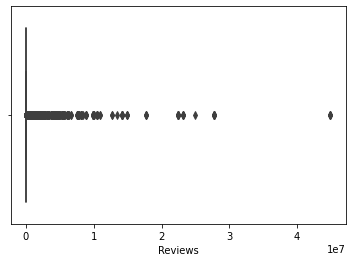

In [77]:
sns.boxplot(y['Reviews']);

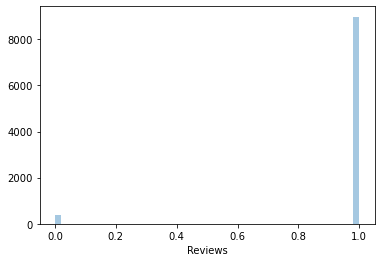

In [78]:
#re = (df["Reviews"]<1000000)
# sns.boxplot((re["Reviews"]<1000000));
sns.distplot((df["Reviews"]<1000000), kde=False);

<AxesSubplot:xlabel='Reviews'>

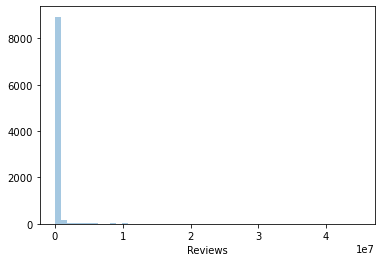

In [79]:
sns.distplot(df['Reviews'], kde=False)

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

In [81]:
import warnings as warn
import socket

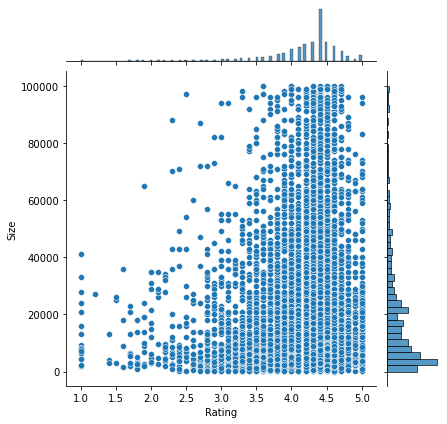

In [82]:
socket.getaddrinfo('localhost', 25)
#tips=sns.load_dataset('tips')
sns.jointplot(x='Rating',y='Size',data=df, kind='scatter')

# 8. Effect of price on rating

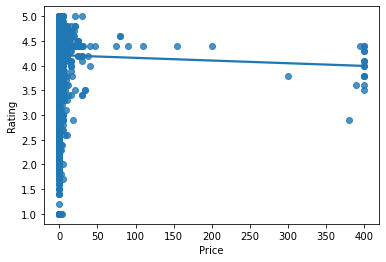

In [83]:
#a. Make a jointplot (with regression line)
sns.regplot(x='Price', y= 'Rating', ci= None, data=df);

# 9. Look at all the numeric interactions together –

a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

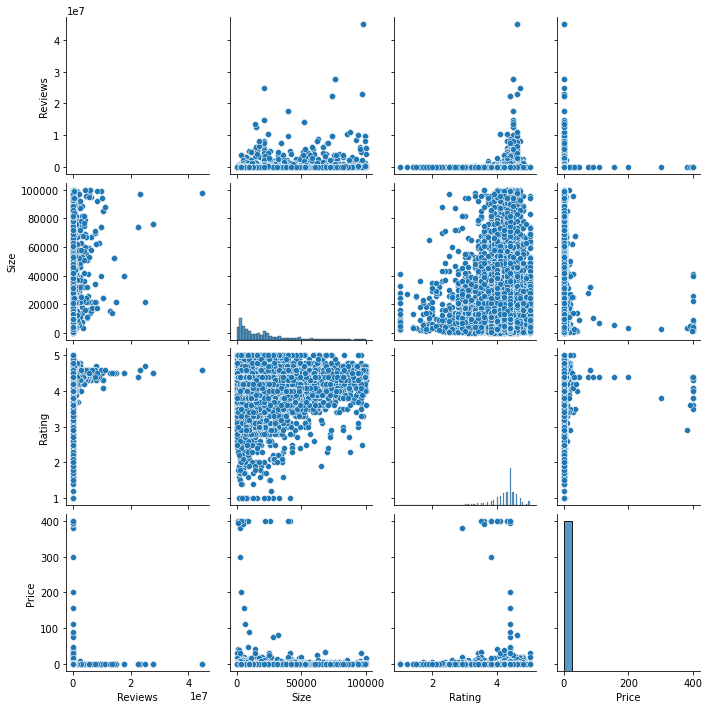

In [84]:
z=df[['Reviews', 'Size', 'Rating', 'Price']]
sns.pairplot(z)

# 11. Content rating vs. size vs. rating – 3 variables at a time

In [85]:
a=df[['Rating','Size', 'Rating']]

<AxesSubplot:>

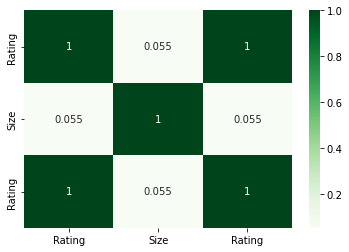

In [86]:
sns.heatmap(a.corr(),cmap='Greens', annot=True)